In [658]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import matplotlib as mpl

## Light sensors


In [659]:
ls1 = ctrl.Antecedent(np.arange(0.0, 1.01, 0.01), "ls1")
ls2 = ctrl.Antecedent(np.arange(0.0, 1.01, 0.01), "ls2")
ls3 = ctrl.Antecedent(np.arange(0.0, 1.01, 0.01), "ls3")

ls1.automf(3, names=["l", "m", "h"])
ls2.automf(3, names=["l", "m", "h"])
ls3.automf(3, names=["l", "m", "h"])

lo = ctrl.Consequent(np.arange(0, 3.01, 0.01), "lo")
lo.defuzzify_method = "mom"

lo["l"] = fuzz.trapmf(lo.universe, [0, 0, 0.5, 1])
lo["m"] = fuzz.trapmf(lo.universe, [0.5, 1, 1.5, 2])
lo["h"] = fuzz.trapmf(lo.universe, [1.5, 2, 3, 3])


In [660]:
l_rules = [
    ctrl.Rule(ls1["l"] & ls2["l"] & ~ls3["h"], lo["l"]),
    ctrl.Rule(ls1["l"] & ~ls2["h"] & ls3["l"], lo["l"]),
    ctrl.Rule(~ls1["h"] & ls2["l"] & ls3["l"], lo["l"]),
    ctrl.Rule(ls1["l"] & ~ls2["h"] & ls3["h"], lo["m"]),
    ctrl.Rule(~ls1["h"] & ls2["h"] & ls3["l"], lo["m"]),
    ctrl.Rule(ls1["h"] & ~ls2["h"] & ls3["l"], lo["m"]),
    ctrl.Rule(ls1["l"] & ls2["h"] & ls3["m"], lo["m"]),
    ctrl.Rule(ls1["m"] & ls2["l"] & ls3["h"], lo["m"]),
    ctrl.Rule(ls1["h"] & ls2["l"] & ls3["m"], lo["m"]),
    ctrl.Rule(ls1["m"] & ls2["m"] & ~ls3["h"], lo["m"]),
    ctrl.Rule(ls1["m"] & ~ls2["h"] & ls3["m"], lo["m"]),
    ctrl.Rule(~ls1["h"] & ls2["m"] & ls3["m"], lo["m"]),
    ctrl.Rule(ls1["h"] & ls2["h"], lo["h"]),
    ctrl.Rule(ls1["h"] & ls3["h"], lo["h"]),
    ctrl.Rule(ls2["h"] & ls3["h"], lo["h"]),
    ctrl.Rule(ls1["h"] & ls2["m"] & ls3["m"], lo["h"]),
    ctrl.Rule(ls1["m"] & ls2["h"] & ls3["m"], lo["h"]),
    ctrl.Rule(ls1["m"] & ls2["m"] & ls3["h"], lo["h"]),
]

lo_ctrl = ctrl.ControlSystem(l_rules)

lo_sim = ctrl.ControlSystemSimulation(lo_ctrl)


In [661]:
# y = []
# y_pred = []

# for l1 in np.arange(0.0, 1.01, 0.05):
#     for l2 in np.arange(0.0, 1.01, 0.05):
#         for l3 in np.arange(0.0, 1.01, 0.05):
#             lo_sim.input["ls1"] = l1
#             lo_sim.input["ls2"] = l2
#             lo_sim.input["ls3"] = l3

#             lo_sim.compute()

#             y_pred.append(0 if lo_sim.output["lo"] <= 0.5 else (1 if lo_sim.output["lo"] <= 1.5 else 2))

#             sum = l1 + l2 + l3

#             y.append(0 if sum <= 0.5 else (1 if sum <= 1.5 else 2))

# c = np.equal(y, y_pred)

# nb_errors = np.size(c) - np.count_nonzero(c)

# print("Numero de erros: " + str(nb_errors))


## PIR sensors


In [662]:
p1 = ctrl.Antecedent(np.arange(0.0, 1.5, 0.5), "p1")
p2 = ctrl.Antecedent(np.arange(0.0, 1.5, 0.5), "p2")

p1["no"] = fuzz.trimf(p1.universe, [0, 0, 0.5])
p1["yes"] = fuzz.trimf(p1.universe, [0.5, 1, 1])

p2["no"] = fuzz.trimf(p2.universe, [0, 0, 0.5])
p2["yes"] = fuzz.trimf(p2.universe, [0.5, 1, 1])

po = ctrl.Consequent(np.arange(0, 1.5, 0.5), "po")
po.defuzzify_method = "mom"

po["no"] = fuzz.trimf(po.universe, [0, 0, 0.5])
po["yes"] = fuzz.trimf(po.universe, [0.5, 1, 1])


In [663]:
p_rules = [
  ctrl.Rule(p1["yes"] | p2["yes"], po["yes"]),
  ctrl.Rule(p1["no"] & p2["no"], po["no"])
]

po_ctrl = ctrl.ControlSystem(p_rules)

po_sim = ctrl.ControlSystemSimulation(po_ctrl)

In [664]:
# y_pir = []
# y_pir_pred = []

# for p1 in [0, 1]:
#     for p2 in [0, 1]:
#         po_sim.input["p1"] = p1
#         po_sim.input["p2"] = p2

#         po_sim.compute()

#         y_pir_pred.append(0 if po_sim.output["po"] <= 0.5 else 1)

#         y_pir.append(0 if (p1 <= 0.5 and p2 <= 0.5) else 1)

#         if y_pir_pred[-1] != y_pir[-1]:
#             print(p1, p2, po_sim.output["po"] <= 0.5)

# nb_errors = np.size(np.equal(y_pir, y_pir_pred)) - np.count_nonzero(np.equal(y_pir, y_pir_pred))

# print("Numero de erros: " + str(nb_errors))


## Mix


In [665]:
lo_mix = ctrl.Antecedent(np.arange(0, 3.01, 0.01), "lo_mix")

lo_mix["l"] = fuzz.trapmf(lo_mix.universe, [0, 0, 0.5, 1])
lo_mix["m"] = fuzz.trapmf(lo_mix.universe, [0.5, 1, 1.5, 2])
lo_mix["h"] = fuzz.trapmf(lo_mix.universe, [1.5, 2, 3, 3])

po_mix = ctrl.Antecedent(np.arange(0, 1.5, 0.5), "po_mix")
po_mix.defuzzify_method = "mom"

po_mix["no"] = fuzz.trimf(po_mix.universe, [0, 0, 0.5])
po_mix["yes"] = fuzz.trimf(po_mix.universe, [0.5, 1, 1])

output = ctrl.Consequent(np.arange(0, 1.5, 0.5), "output")
output.defuzzify_method = "mom"

output["no"] = fuzz.trimf(output.universe, [0, 0, 0.5])
output["yes"] = fuzz.trimf(output.universe, [0.5, 1, 1])

In [666]:
output_rules = [
    ctrl.Rule(lo_mix["l"], output["no"]),
    ctrl.Rule(lo_mix["m"] & po_mix["no"], output["no"]),
    ctrl.Rule(lo_mix["m"] & po_mix["yes"], output["yes"]),
    ctrl.Rule(lo_mix["h"], output["yes"]),
]

output_ctrl = ctrl.ControlSystem(output_rules)

output_sim = ctrl.ControlSystemSimulation(output_ctrl)

In [667]:
def getOutliersFromAverage(data, gain):
    outliers = []

    for feature in data.columns:
        average = data[feature].mean()
        std = data[feature].std()

        outliers += (
            data[feature][data[feature] <= (average - std * gain)].index.tolist()
            + data[feature][data[feature] >= (average + std * gain)].index.tolist()
        )

    return list(dict.fromkeys(outliers))


def removeLine(data, indexes):
    return data.drop(indexes)


df = pd.read_csv("Proj1_Dataset.csv")

for feature in df.columns:
    df = df[df[feature].notna()]

df_features = df.drop(["Date", "Time", "Persons"], axis=1)

df_output = df["Persons"]

df_dates = df["Date"]

standard = StandardScaler().fit_transform(df_features.values)

project_df = pd.DataFrame(standard, index=df_features.index, columns=df_features.columns)

outliers = getOutliersFromAverage(project_df, 6)
new_project_df = removeLine(project_df, outliers)
new_output_df = removeLine(df_output, outliers)
new_dates_df = removeLine(df_dates, outliers)

for i, row in new_output_df.items(): 
    if row == 3:
        new_output_df[i] = 1
    else:
        new_output_df[i] = 0

new_project_df["S1Light"] = (new_project_df["S1Light"] - new_project_df["S1Light"].min()) / (new_project_df["S1Light"].max() - new_project_df["S1Light"].min())
new_project_df["S2Light"] = (new_project_df["S2Light"] - new_project_df["S2Light"].min()) / (new_project_df["S2Light"].max() - new_project_df["S2Light"].min())
new_project_df["S3Light"] = (new_project_df["S3Light"] - new_project_df["S3Light"].min()) / (new_project_df["S3Light"].max() - new_project_df["S3Light"].min())

In [668]:
X = new_project_df.to_numpy()
Y = new_output_df.to_numpy()

X_filtered = np.concatenate((X[:, 3:6], X[:, 7:9]), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_filtered, Y, test_size=0.2, random_state=1)


+-----------+-----------------+-------------------------------+
|           |                 |              True             |
+-----------+-----------------+-------------+-----------------+
|           |                 | Not Overcrowded | Overcrowded |
+-----------+-----------------+-------------+-----------------+
| Predicted | Not Overcrowded |       6896      |      140    |
|           +-----------------+-------------+-----------------+
|           |   Overcrowded   |        581      |      479    |
+-----------+-----------------+-------------+-----------------+

Precision: 0.4518867924528302
Recall: 0.7738287560581584
F1: 0.570577724836212

+-----------+-----------------+-------------------------------+
|           |                 |              True             |
+-----------+-----------------+-------------+-----------------+
|           |                 | Not Overcrowded | Overcrowded |
+-----------+-----------------+-------------+-----------------+
| Predicted | Not Over

/media/brunomcebola/Data/Faculdade/5º ano 1º trimestre/CInt/CInt-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1863
           1       0.90      0.91      0.90       162

    accuracy                           0.98      2025
   macro avg       0.94      0.95      0.95      2025
weighted avg       0.98      0.98      0.98      2025



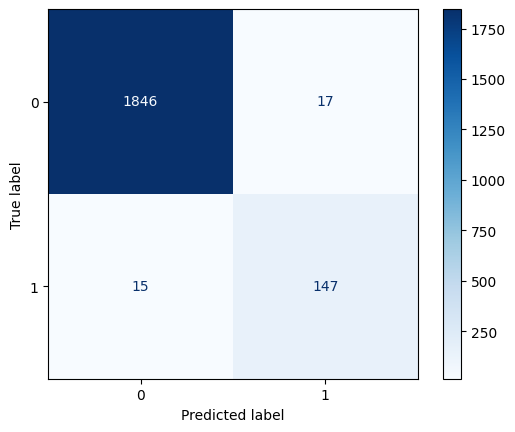

In [669]:
TP = TN = FP = FN = 0
indexes = []

# train
for id, x in enumerate(X_train):
    # compute total light
    lo_sim.input["ls1"] = x[0]
    lo_sim.input["ls2"] = x[1]
    lo_sim.input["ls3"] = x[2]

    lo_sim.compute()
    lo_mix_in = lo_sim.output["lo"]

    # compute total motion
    po_sim.input["p1"] = x[3]
    po_sim.input["p2"] = x[4]

    po_sim.compute()
    po_mix_in = po_sim.output["po"]

    # compute mix
    output_sim.input["lo_mix"] = lo_mix_in
    output_sim.input["po_mix"] = po_mix_in

    output_sim.compute()

    correct = y_train[id]
    predicted = 0 if output_sim.output["output"] < 0.5 else 1

    # Se preveu bem overcrowded
    if predicted == 1 and correct == 1:
        TP += 1
    # Se preveu bem not overcrowded
    elif predicted == 0 and correct == 0:
        TN += 1
    # Se preveu overcrowded erradamente
    elif predicted == 1 and correct == 0:
        FP += 1
        indexes.append(i)
    # Se preveu not overcrowded erradamente
    elif predicted == 0 and correct == 1:
        FN += 1
        indexes.append(i)

confusion_matrix = np.array([[TP, FP], [FN, TN]])
print(
    f"""
+-----------+-----------------+-------------------------------+
|           |                 |              True             |
+-----------+-----------------+-------------+-----------------+
|           |                 | Not Overcrowded | Overcrowded |
+-----------+-----------------+-------------+-----------------+
| Predicted | Not Overcrowded |       {TN:4.0f}      |     {FN:4.0f}    |
|           +-----------------+-------------+-----------------+
|           |   Overcrowded   |       {FP:4.0f}      |     {TP:4.0f}    |
+-----------+-----------------+-------------+-----------------+
"""
)

print(f"Precision: {TP/(TP+FP)}")
print(f"Recall: {TP/(TP+FN)}")
print(f"F1: {2*TP/(2*TP+FP+FN)}")

TP = TN = FP = FN = 0

# test
for id, x in enumerate(X_test):
    # compute total light
    lo_sim.input["ls1"] = x[0]
    lo_sim.input["ls2"] = x[1]
    lo_sim.input["ls3"] = x[2]

    lo_sim.compute()
    lo_mix_in = lo_sim.output["lo"]

    # compute total motion
    po_sim.input["p1"] = x[3]
    po_sim.input["p2"] = x[4]

    po_sim.compute()
    po_mix_in = po_sim.output["po"]

    # compute mix
    output_sim.input["lo_mix"] = lo_mix_in
    output_sim.input["po_mix"] = po_mix_in

    output_sim.compute()

    correct = y_test[id]
    predicted = 0 if output_sim.output["output"] < 0.5 else 1

    # Se preveu bem overcrowded
    if predicted == 1 and correct == 1:
        TP += 1
    # Se preveu bem not overcrowded
    elif predicted == 0 and correct == 0:
        TN += 1
    # Se preveu overcrowded erradamente
    elif predicted == 1 and correct == 0:
        FP += 1
        indexes.append(i)
    # Se preveu not overcrowded erradamente
    elif predicted == 0 and correct == 1:
        FN += 1
        indexes.append(i)

confusion_matrix = np.array([[TP, FP], [FN, TN]])
print(
    f"""
+-----------+-----------------+-------------------------------+
|           |                 |              True             |
+-----------+-----------------+-------------+-----------------+
|           |                 | Not Overcrowded | Overcrowded |
+-----------+-----------------+-------------+-----------------+
| Predicted | Not Overcrowded |       {TN:4.0f}      |     {FN:4.0f}    |
|           +-----------------+-------------+-----------------+
|           |   Overcrowded   |       {FP:4.0f}      |     {TP:4.0f}    |
+-----------+-----------------+-------------+-----------------+
"""
)

print(f"Precision: {TP/(TP+FP)}")
print(f"Recall: {TP/(TP+FN)}")
print(f"F1: {2*TP/(2*TP+FP+FN)}")

# MLP to compare
clf = MLPClassifier(random_state=0, max_iter=200)

y_pred = clf.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred))  # type: ignore

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap=mpl.cm.Blues)
plt.show()
